In [22]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = pd.read_csv("data/iris names.txt", names=['names'])
columns

,names
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [3]:
data = pd.read_csv("data/iris2.data", sep="\t", header=None, names=columns['names'])
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [23]:
class_1 = data[data['class'] == 1]
class_2 = data[data['class'] == 2]
class_3 = data[data['class'] == 3]

In [5]:
sepal_length_interval_1 = [class_1['sepal length in cm'].min(), class_1['sepal length in cm'].max()]
sepal_width_interval_1 = [class_1['sepal width in cm'].min(), class_1['sepal width in cm'].max()]
petal_length_interval_1 = [class_1['petal length in cm'].min(), class_1['petal length in cm'].max()]
petal_width_interval_1 = [class_1['petal width in cm'].min(), class_1['petal width in cm'].max()]
sepal_length_interval_2 = [class_2['sepal length in cm'].min(), class_2['sepal length in cm'].max()]
sepal_width_interval_2 = [class_2['sepal width in cm'].min(), class_2['sepal width in cm'].max()]
petal_length_interval_2 = [class_2['petal length in cm'].min(), class_2['petal length in cm'].max()]
petal_width_interval_2 = [class_2['petal width in cm'].min(), class_2['petal width in cm'].max()]
sepal_length_interval_3 = [class_3['sepal length in cm'].min(), class_3['sepal length in cm'].max()]
sepal_width_interval_3 = [class_3['sepal width in cm'].min(), class_3['sepal width in cm'].max()]
petal_length_interval_3 = [class_3['petal length in cm'].min(), class_3['petal length in cm'].max()]
petal_width_interval_3 = [class_3['petal width in cm'].min(), class_3['petal width in cm'].max()]

In [6]:
sepal_length_mean_1 = class_1['sepal length in cm'].mean()
sepal_width_mean_1 = class_1['sepal width in cm'].mean()
petal_length_mean_1 = class_1['petal length in cm'].mean()
petal_width_mean_1 = class_1['petal width in cm'].mean()
sepal_length_mean_2 = class_2['sepal length in cm'].mean()
sepal_width_mean_2 = class_2['sepal width in cm'].mean()
petal_length_mean_2 = class_2['petal length in cm'].mean()
petal_width_mean_2 = class_2['petal width in cm'].mean()
sepal_length_mean_3 = class_3['sepal length in cm'].mean()
sepal_width_mean_3 = class_3['sepal width in cm'].mean()
petal_length_mean_3 = class_3['petal length in cm'].mean()
petal_width_mean_3 = class_3['petal width in cm'].mean()

In [24]:
def draw_plots(df_1, df_2, df_3, rows, cols):
    # df_1 - dataframe of class 1
    # df_2 - dataframe of class 2
    # df_3 - dataframe of class 3
    # rows - row count of a plot group
    # cols - column count of a plot group
    fig, ax = plt.subplots(nrows=rows,
                           ncols=cols,
                           figsize=(10,10))
    columns = df_1.columns.to_list()
    c = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].scatter(x=df_1[columns[c]].index, y=df_1[columns[c]], facecolors='none', edgecolors='red')
            ax[i,j].scatter(x=df_2[columns[c]].index, y=df_2[columns[c]], facecolors='none', edgecolors='green')
            ax[i,j].scatter(x=df_3[columns[c]].index, y=df_3[columns[c]], facecolors='none', edgecolors='blue')
            ax[i,j].grid(which='Major', axis='both')
            ax[i,j].set(title=f"{' '.join(columns[c].split()[:2]).title()}",
                        xlabel="Samples",
                        axisbelow=True)
            ax[i,j].set(ylabel="Length, cm") if j/2 == 0 else ax[i,j].set(ylabel="Width, cm")
            ax[i,j].legend(["Class 1", "Class 2", "Class 3"], title="Class distribution")
            c += 1
    fig.savefig("images/parameter_distribution.png")

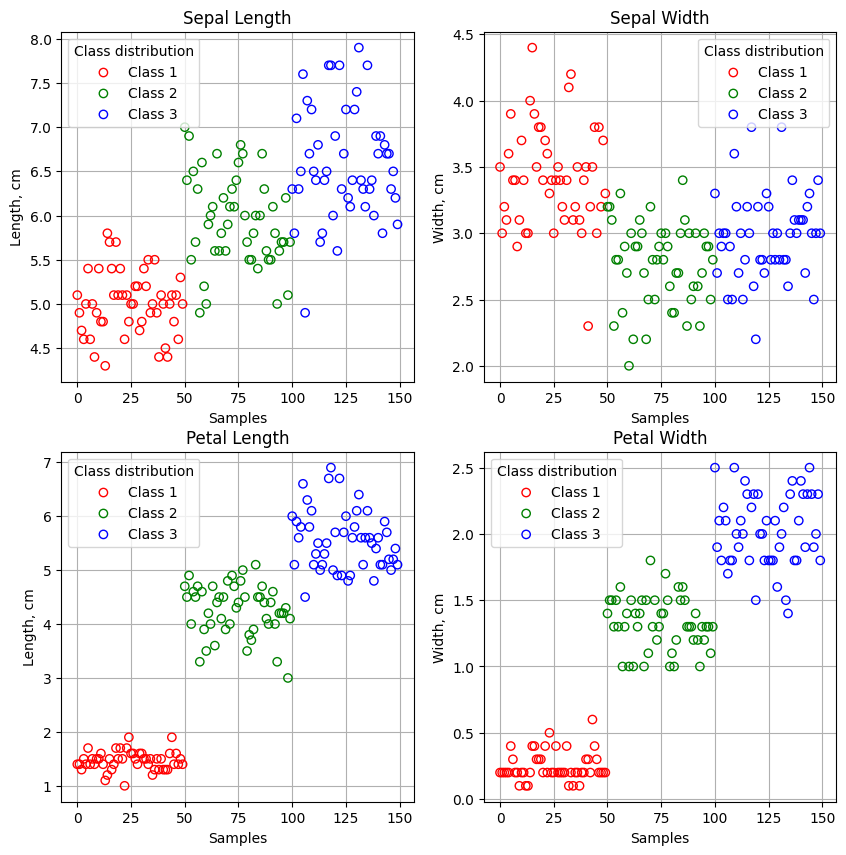

In [25]:
draw_plots(class_1, class_2, class_3, 2, 2)

In [18]:
x = np.arange(4.5, 8, 0.01)
trimf1 = fuzz.trimf(x, [sepal_length_interval_1[0], sepal_length_mean_1, sepal_length_interval_1[1]])
trimf2 = fuzz.trimf(x, [sepal_length_interval_2[0], sepal_length_mean_2, sepal_length_interval_2[1]])
trimf3 = fuzz.trimf(x, [sepal_length_interval_3[0], sepal_length_mean_3, sepal_length_interval_3[1]])

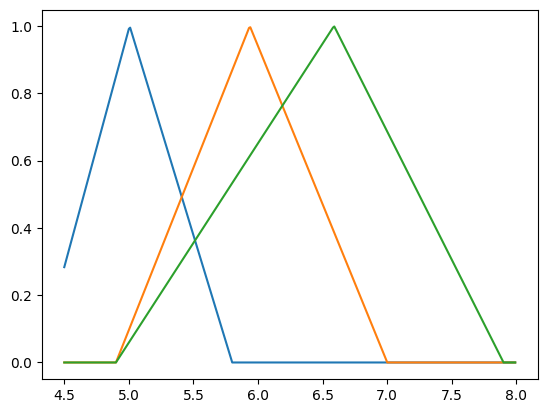

In [20]:
plt.plot(x, trimf1, label="Triangle")
plt.plot(x, trimf2, label="Triangle")
plt.plot(x, trimf3, label="Triangle");